In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

In [2]:
import pandas 

df = pandas.read_csv( 'feature_sets/tm_combined.csv', index_col=0 )
df.columns

Index([u'tot_pstat_pm_enzyme_design', u'helix dipole_foldx',
       u'Electrostatics_foldx', u'fa_elec_ddg', u'Van der Waals_foldx',
       u'rama_ddg', u'fa_intra_rep_ddg', u'SR_5_hbond_sc_enzyme_design',
       u'energy Ionisation_foldx', u'p_aa_pp_ddg',
       u'SR_2_hbond_pm_enzyme_design', u'fa_atr_ddg',
       u'tot_nlpstat_pm_enzyme_design', u'tot_total_charge_enzyme_design',
       u'SR_3_burunsat_pm_enzyme_design',
       u'tot_total_pos_charges_enzyme_design', u'torsional clash_foldx',
       u'tot_hbond_pm_enzyme_design', u'Solvation Hydrophobic_foldx',
       u'fa_sol_ddg', u'Solvation Polar_foldx', u'omega_ddg', u'fa_rep_ddg',
       u'tot_total_neg_charges_enzyme_design',
       u'tot_burunsat_pm_enzyme_design', u'hbond_sc_enzyme_design',
       u'total energy_foldx', u'SR_2_pstat_pm_enzyme_design',
       u'SR_1_hbond_pm_enzyme_design', u'SR_4_total_score_enzyme_design',
       u'SR_3_nlpstat_pm_enzyme_design', u'SR_5_interf_E_1_2_enzyme_design',
       u'yhh_planarity_d

In [3]:
from sklearn import preprocessing, linear_model, cross_validation, ensemble

scl = preprocessing.MinMaxScaler()
X = scl.fit_transform( df.ix[:,:-1] )
#y = scl.fit_transform( df.ix[:,-1].reshape( -1, 1 ) ).ravel()
y = df.ix[:,-1].as_matrix().ravel()

print X.shape
print y.shape 

(60, 76)
(60,)


/usr/local/bin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


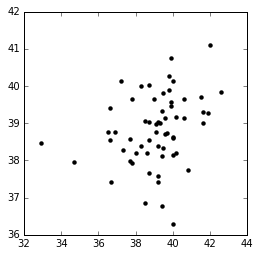

In [4]:
# elastic net 

param_grid = {
    'l1_ratio': [ 0.5, 0.9, .99 ],
}

clf = linear_model.ElasticNetCV( cv=10, **param_grid )
bag = ensemble.BaggingRegressor( clf, n_estimators=10 ) 
preds = cross_validation.cross_val_predict( bag, X, y ) 

plt.figure( figsize=( 4,4 ) ) 
plt.scatter( y, preds, color='k', lw=0 ) 

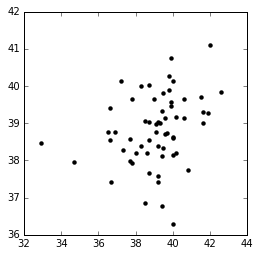

In [5]:
new_preds = bag.fit( X, y ).predict( X )
plt.figure( figsize=( 4,4 ) ) 
plt.scatter( y, preds, color='k', lw=0 ) 

In [6]:
my_import = pandas.DataFrame( zip( df.columns[:-1], clf.coef_ ) )
my_import.set_index( 0, inplace=True ) 
my_import
#my_import = my_import.sort_values() 

AttributeError: 'ElasticNetCV' object has no attribute 'coef_'

In [ ]:
my_sorted = df.corr()[ 'tm' ].sort_values()

In [ ]:
plt.figure( figsize=( 18, 5 ) ) 
plt.title('Feature importances for predicting Tm from 71 features from\nFoldX, Rosetta ddG, and RosettaDesign')

plt.bar( range( len( my_sorted ) ), my_sorted, color='lightblue',
         align='center', lw=0) #, ecolor='k', yerr=st, error_kw=dict(capsize=0) )
plt.xticks( range( len( my_sorted ) ), my_sorted.index, rotation=90 )            

#plt.ylim( 0, .13 )
#plt.xlim( -1, 73 ) 
plt.tight_layout()
plt.show()